In [ ]:
!pip install mediapipe

In [ ]:
!pip install opencv-python

In [ ]:
#MediaPipe

MediaPipe offers open source cross-platform, customizable ML solutions for live and streaming media. 
End-to-End acceleration: Built-in fast ML inference and processing accelerated even on common hardware. 
Build once, deploy anywhere: Unified solution works across Android, iOS, desktop/cloud, web and IoT.

In [ ]:
#face mesh 3d with body pose on images

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in glob.glob("./images/testing/*.jpg")}

In [4]:
for name, image in images.items():
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#    plt.imshow(image)
#    plt.show()


In [5]:
import mediapipe as mp
mp_holistic = mp.solutions.holistic

#help(mp_holistic.Holistic)

In [6]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [9]:
# Initialize MediaPipe Pose.
import cv2
import time
import mediapipe as mp


class PoseDetector:

    def __init__(self, mode = False, upBody = False, smooth=True, detectionCon = 0.5, trackCon = 0.5):

        self.mode = mode
        self.upBody = upBody
        self.smooth = smooth
        self.detectionCon = detectionCon
        self.trackCon = trackCon

        self.mpDraw = mp.solutions.drawing_utils
        self.mpPose = mp.solutions.pose
        self.pose = self.mpPose.Pose(self.mode, self.upBody, self.smooth, self.detectionCon, self.trackCon)

    def findPose(self, img, draw=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.pose.process(imgRGB)
        if self.results.pose_landmarks:
            if draw:
                self.mpDraw.draw_landmarks(img, self.results.pose_landmarks, self.mpPose.POSE_CONNECTIONS)

        return img, self.results.pose_landmarks, self.mpPose.POSE_CONNECTIONS

    def getPosition(self, img, draw=True):
        lmList= []
        if self.results.pose_landmarks:
            for id, lm in enumerate(self.results.pose_landmarks.landmark):
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmList.append([id, cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 5, (255, 0, 0), cv2.FILLED)
        return lmList




pTime = 0
cap = cv2.VideoCapture(0)

detector = PoseDetector()















i=0
img_array = []

for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.


    img, p_landmarks, p_connections = detector.findPose(image, False)
    
    
    # draw points
    mp.solutions.drawing_utils.draw_landmarks(img, p_landmarks, p_connections)
    lmList = detector.getPosition(img)
#    plt.imshow(annotated_image)
#    plt.show()
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('projectYOGA-POSE.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [12]:
# Initialize MediaPipe Holistic.
i=0
img_array = []
with mp_holistic.Holistic(
    static_image_mode=False,min_detection_confidence=0.8) as holistic:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose coordinates.
    image_hight, image_width, _ = image.shape
    if results.pose_landmarks:
      print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
      )
    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image=annotated_image, 
        landmark_list=results.face_landmarks, 
        connections=mp_holistic.FACE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    mp_drawing.draw_landmarks(
        image=annotated_image, 
        landmark_list=results.pose_landmarks, 
        connections=mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    #cv2_imshow(annotated_image)
    #cv2.imwrite("imag1", annotated_image)
    plt.figure(figsize=(10,15))
#    plt.imshow(annotated_image)
#    plt.show()
    height, width, layers = image.shape
    size = (width,height)
    img_array.append(annotated_image)
 
 
out = cv2.VideoWriter('projectYOGA.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

Pose landmarks of ./images/testing\image10001.jpg:
Pose landmarks of ./images/testing\image10002.jpg:
Nose coordinates: (210.30799627304077, 218.10968017578125)
Pose landmarks of ./images/testing\image10003.jpg:
Nose coordinates: (213.67441534996033, 218.95660400390625)
Pose landmarks of ./images/testing\image10004.jpg:
Nose coordinates: (212.70280122756958, 221.44407653808594)
Pose landmarks of ./images/testing\image10005.jpg:
Nose coordinates: (212.30415523052216, 222.32736206054688)
Pose landmarks of ./images/testing\image10006.jpg:
Nose coordinates: (212.52109229564667, 222.8578643798828)
Pose landmarks of ./images/testing\image10007.jpg:
Nose coordinates: (213.71760964393616, 224.38465881347656)
Pose landmarks of ./images/testing\image10008.jpg:
Nose coordinates: (214.3696117401123, 224.0242156982422)
Pose landmarks of ./images/testing\image10009.jpg:
Nose coordinates: (214.4388771057129, 222.40492248535156)
Pose landmarks of ./images/testing\image10010.jpg:
Nose coordinates: (214

C:\Users\K\anaconda3\envs\sketchML\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Nose coordinates: (215.66003322601318, 223.65855407714844)
Pose landmarks of ./images/testing\image10023.jpg:
Nose coordinates: (215.66986620426178, 225.9799346923828)
Pose landmarks of ./images/testing\image10024.jpg:
Nose coordinates: (215.76389908790588, 228.43798828125)
Pose landmarks of ./images/testing\image10025.jpg:
Nose coordinates: (215.8204025030136, 229.82081604003906)
Pose landmarks of ./images/testing\image10026.jpg:
Nose coordinates: (215.5859398841858, 232.29739379882812)
Pose landmarks of ./images/testing\image10027.jpg:
Nose coordinates: (215.1009213924408, 233.90093994140625)
Pose landmarks of ./images/testing\image10028.jpg:
Nose coordinates: (215.1668232679367, 234.74160766601562)
Pose landmarks of ./images/testing\image10029.jpg:
Nose coordinates: (215.1884365081787, 238.6619415283203)
Pose landmarks of ./images/testing\image10030.jpg:
Nose coordinates: (215.48274993896484, 240.1597137451172)
Pose landmarks of ./images/testing\image10031.jpg:
Nose coordinates: (21

Nose coordinates: (228.59844624996185, 377.4900817871094)
Pose landmarks of ./images/testing\image10099.jpg:
Nose coordinates: (235.24711668491364, 367.27593994140625)
Pose landmarks of ./images/testing\image10100.jpg:
Nose coordinates: (238.97619724273682, 359.2822265625)
Pose landmarks of ./images/testing\image10101.jpg:
Nose coordinates: (242.3389309644699, 349.2238464355469)
Pose landmarks of ./images/testing\image10102.jpg:
Nose coordinates: (247.01847910881042, 342.5802307128906)
Pose landmarks of ./images/testing\image10103.jpg:
Nose coordinates: (253.2668137550354, 325.1631774902344)
Pose landmarks of ./images/testing\image10104.jpg:
Nose coordinates: (254.94995892047882, 314.34320068359375)
Pose landmarks of ./images/testing\image10105.jpg:
Nose coordinates: (257.73285269737244, 303.7427978515625)
Pose landmarks of ./images/testing\image10106.jpg:
Nose coordinates: (263.65563690662384, 292.3304748535156)
Pose landmarks of ./images/testing\image10107.jpg:
Nose coordinates: (270

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

In [ ]:
from abc import ABCMeta, abstractmethod

import numpy as np


class AbstDetector(metaclass=ABCMeta):
    @abstractmethod
    def detect(self, image: np.ndarray) -> bool:
        """モデルによる推論処理
        Args:
            image (np.ndarray): 入力イメージ
        Returns:
            bool: 対象物体（手や顔）が検出できたかどうか
        """
        pass

    @abstractmethod
    def draw(self, image: np.ndarray) -> np.ndarray:
        """推論結果を描画する
        Args:
            image (np.ndarray): ベースイメージ
        Returns:
            np.ndarray: 描画済みイメージ
        """
        pass

In [14]:
import cv2
import numpy as np
import mediapipe as mp


from .abst_detector import AbstDetector


class PoseEstimator(AbstDetector):
    def __init__(self, min_detection_confidence: float, min_tracking_confidence: float) -> None:
        """初期化処理
        Args:
            min_detection_confidence (float): 姿勢推定モデルの最小信頼値
            min_tracking_confidence (float): ランドマーク追跡モデルからの最小信頼値
        """
        self.estimator = mp.solutions.pose.Pose(
            min_detection_confidence=min_detection_confidence,
            min_tracking_confidence=min_tracking_confidence,
        )

    def detect(self, image: np.ndarray) -> bool:
        """姿勢推定処理
        Args:
            image (np.ndarray): 入力イメージ
        Returns:
            bool: 手が検出できたか
        """
        try:
            self.results = self.estimator.process(image)
        except Exception as e:
            logger.error(e)
        return True if self.results.pose_landmarks is not None else False

    def draw(self, image: np.ndarray) -> np.ndarray:
        """処理結果を描画する
        Args:
            image (np.ndarray): ベースイメージ
        Returns:
            np.ndarray: 描画済みイメージ
        """
        landmark_buf = []
        base_width, base_height = image.shape[1], image.shape[0]

        # draw landmark points
        for landmark in self.results.pose_landmarks.landmark:
            x = min(int(landmark.x * base_width), base_width - 1)
            y = min(int(landmark.y * base_height), base_height - 1)
            landmark_buf.append((x, y))
            cv2.circle(image, (x, y), 2, (255, 0, 0), 5)

        # draw connections
        for con_pair in mp.solutions.pose.POSE_CONNECTIONS:
            cv2.line(image, landmark_buf[con_pair[0].value],
                     landmark_buf[con_pair[1].value], (255, 0, 0), 2)

        return image

ModuleNotFoundError: No module named '__main__.abst_detector'; '__main__' is not a package

In [41]:
#face mesh 3d on camera

In [ ]:
#MediaPipe

MediaPipe offers open source cross-platform, customizable ML solutions for live and streaming media. 
End-to-End acceleration: Built-in fast ML inference and processing accelerated even on common hardware. 
Build once, deploy anywhere: Unified solution works across Android, iOS, desktop/cloud, web and IoT.

In [ ]:
!pip install mediapipe

In [ ]:
!pip install opencv-python

In [ ]:
Face Mesh 468 point 3D face landmarks in video even on mobile devices and web application MediaPipe

In [ ]:
#camera

In [ ]:
#image manipulation

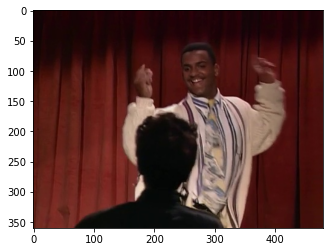

In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("image1073.jpg")
gray =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#Show the image with matplotlib
plt.imshow(gray)
plt.show()

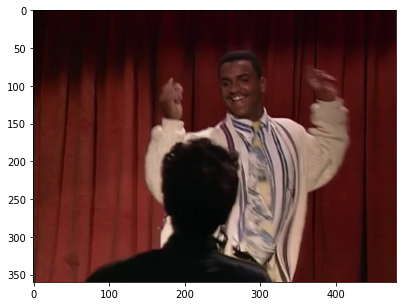

In [2]:
import cv2
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

# Acquire default dots per inch value of matplotlib
dpi = matplotlib.rcParams['figure.dpi']

img = cv2.imread("image1073.jpg")
img =cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Determine the figures size in inches to fit your image
height, width, depth = img.shape
figsize = width / float(dpi), height / float(dpi)

plt.figure(figsize=figsize)
plt.imshow(img)
plt.show()

In [3]:
figsize

(6.666666666666667, 5.0)